In [1]:
import numpy as np
import pandas as pd

In [2]:
company= 'ITC.NS'

In [3]:
df= pd.read_csv(f'../dataset/{company}-train.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-11,85.849998,87.766663,85.849998,86.516663,62.791348,9940143
1,2010-05-12,84.166664,88.633331,84.166664,88.349998,64.121948,5336889
2,2010-05-13,89.000000,89.333336,87.916664,88.833336,64.472733,6069930
3,2010-05-14,87.666664,91.000000,87.666664,89.383331,64.871910,8906088
4,2010-05-17,88.666664,89.633331,88.333336,88.716667,64.388062,7166223


In [4]:
trainSet= df.iloc[:, 1:2].values

In [5]:
df.shape

(2713, 7)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

In [7]:
trainingSetScaled= scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [8]:
xTRAIN = []
yTRAIN = []

for i in range(60, len(trainingSetScaled)):
    xTRAIN.append(trainingSetScaled[i-60:i, 0])
    yTRAIN.append(trainingSetScaled[i, 0])
    
xTRAIN, yTRAIN= np.array(xTRAIN), np.array(yTRAIN)

In [9]:
xTRAIN= np.reshape(xTRAIN, newshape=(xTRAIN.shape[0], xTRAIN.shape[1], 1))

In [10]:
trainingSetScaled.shape

(2713, 1)

In [11]:
xTRAIN.shape

(2653, 60, 1)

In [12]:
yTRAIN.shape

(2653,)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
regressor= keras.models.Sequential([
    keras.layers.LSTM(units=64, return_sequences= True, input_shape= (xTRAIN.shape[1], 1)),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=50, return_sequences= True), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=50), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.Dense(units= 1)
])

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            23000     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [16]:
regressor.compile(optimizer= 'adam', loss= keras.losses.mean_squared_error)

In [17]:
regressor.fit(x= xTRAIN, y=yTRAIN, batch_size= 32, epochs= 100)

Epoch 1/100
83/83 [==============================] - 6s 19ms/step - loss: 0.0147
Epoch 2/100
83/83 [==============================] - 2s 19ms/step - loss: 0.0040
Epoch 3/100
83/83 [==============================] - 2s 18ms/step - loss: 0.0038
Epoch 4/100
83/83 [==============================] - 2s 18ms/step - loss: 0.0033
Epoch 5/100
83/83 [==============================] - 1s 18ms/step - loss: 0.0031
Epoch 6/100
83/83 [==============================] - 2s 18ms/step - loss: 0.0032
Epoch 7/100
83/83 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 8/100
83/83 [==============================] - 1s 18ms/step - loss: 0.0027
Epoch 9/100
83/83 [==============================] - 2s 18ms/step - loss: 0.0027
Epoch 10/100
83/83 [==============================] - 2s 18ms/step - loss: 0.0026
Epoch 11/100
83/83 [==============================] - 2s 18ms/step - loss: 0.0026
Epoch 12/100
83/83 [==============================] - 2s 18ms/step - loss: 0.0024
Epoch 13/100
83/83 [=====

In [18]:
prdctn= regressor.predict(xTRAIN)

83/83 [==============================] - 1s 8ms/step


In [19]:
regressor.save(f"../model/exports/{company}/")

INFO:tensorflow:Assets written to: ../model/exports/ITC.NS/assets


INFO:tensorflow:Assets written to: ../model/exports/ITC.NS/assets


In [20]:
testDF= pd.read_csv(f'../dataset/{company}-test.csv')
testDF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-10,207.149994,207.449997,205.000000,205.550003,188.025925,16295368
1,2021-05-11,203.899994,206.500000,203.750000,204.000000,186.608047,13747541
2,2021-05-12,203.899994,205.250000,202.850006,203.250000,185.922012,16537612
3,2021-05-14,205.000000,213.199997,204.000000,212.250000,194.154709,61647120
4,2021-05-17,216.800003,217.000000,211.649994,212.600006,194.474869,38001828
...,...,...,...,...,...,...,...
489,2023-04-28,418.000000,428.250000,413.700012,425.549988,425.549988,12718721
490,2023-05-02,426.000000,427.000000,421.200012,424.450012,424.450012,10253527
491,2023-05-03,424.000000,428.500000,422.049988,427.149994,427.149994,7325483
492,2023-05-04,425.299988,427.000000,424.000000,424.600006,424.600006,7984933


In [21]:
realSP= testDF['Close'].values

In [22]:
dfTotal= pd.concat((df['Open'], testDF['Open']), axis=0)

In [23]:
modelInp= dfTotal[len(dfTotal)-len(testDF)-60:].values

In [24]:
modelInp= modelInp.reshape(-1,1)

In [25]:
modelInp= scaler.transform(modelInp)

In [26]:
xTEST= []

for i in range(60, len(modelInp)):
    xTEST.append(modelInp[i-60:i, 0])

xTEST= np.array(xTEST)

In [27]:
xTEST.shape

(494, 60)

In [28]:
xTEST= np.reshape(xTEST, newshape= (xTEST.shape[0], xTEST.shape[1], 1))

In [29]:
#pred = pred[..., 0]

In [30]:
pred= regressor.predict(xTEST)

16/16 [==============================] - 0s 17ms/step


In [31]:
pred= scaler.inverse_transform(pred)

In [32]:
pred.shape

(494, 1)

In [33]:
import matplotlib.pyplot as plt

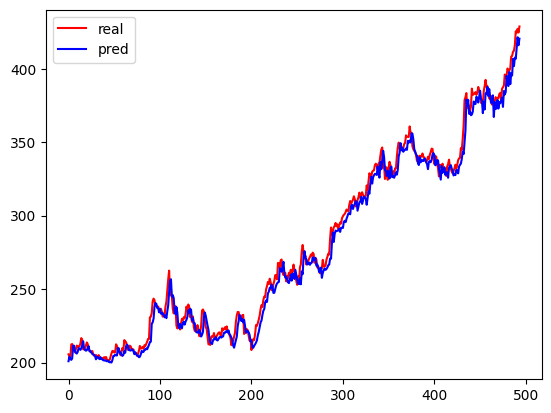

In [34]:
plt.plot(realSP, color= 'r', label= 'real')
plt.plot(pred, color= 'b', label= 'pred')
plt.legend()
plt.show()

In [35]:
realData= [modelInp[len(modelInp)+1-60:len(modelInp+1), 0]]

In [36]:
realData= np.array(realData)

In [37]:
realData= np.reshape(realData, newshape=(realData.shape[0], realData.shape[1], 1))

In [38]:
prediction= regressor.predict(realData)

1/1 [==============================] - 1s 660ms/step


In [39]:
prediction= scaler.inverse_transform(prediction)

In [40]:
prediction

array([[420.25064]], dtype=float32)